# `hw1`: Exploration of pulse oximetry data

Deadline: **Monday, November 4, 11:59 PM**. 
- Submit your completed notebook on your personal Github repository created when accepting the assignment.
- All cells must be executable and their outputs should not be erased before submission.
- Homeworks are carried out *individually*.

In [17]:
# Fill in this cell with your personal details:
# - Name: Florea Robert
# - Student ID: S201068
# - Email: robert.florea@student.uliege.be

In this homework, you will have to load, clean, and explore pulse oximetry data from the [ OpenOximetry Repository](https://physionet.org/content/openox-repo/1.0.1). This dataset of oxygen desaturation studies notably includes oxygen saturation (SPO2 / SO2) measures from blood samples and unprocessed photoplethysmography (PPG) from pulse oximeters.

The goal of this first homework is to prepare the data and to perform some basic exploratory analysis. The same dataset will be used in the next homeworks, so it is important to understand the data and to prepare it properly.

All documentation about the dataset can be found on the dataset webpage and in the downloaded files.

First, create a [Physionet Account](https://physionet.org/register). Then, read and sign the [Data Use Agreement](https://physionet.org/sign-dua/openox-repo/1.0.1/). Finally, download the files in the [OpenOximetry Repository Files Section](https://physionet.org/content/openox-repo/1.0.1#files). Decompress the dataset in a directory named `data/` at the root of your project. Make sure to add `data/*` to your `.gitignore` file.

# Exercises

- Solve the exercises below by making the best use of the API offered in `numpy`, `pandas` and `matplotlib`.
- You will also need to use the `wfdb` library for reading and writing waveform data (see [WFDB Documentation](https://wfdb.readthedocs.io/en/latest/wfdb.html)).
- For plots, feel free to use `matplotlib`, `seaborn` or `pandas` built-in plotting functions.
- Follow the data visualization principles as best as possible to make your plots effective and readable.
- For each exercise, add Markdown cells to explain what you are doing and to discuss your results.

In [18]:
import warnings
import wfdb as wf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-success">
    
**Exercise**. Load the data from `data/patient.csv`, `data/encounter.csv`, and `data/bloodgas.csv` into dataframes. Visualise the raw data, understand the mearning of the different columns and values, drop or combine rows and columns if needed. Justify your choices.

The resulting dataframes should have unique values in columns `patient_id`, `encounter_id` and `('encounter_id', 'date', 'time')`, respectively. It may be preferable to merge columns `date` and `time` in a proper `datetime` column for the last dataframe.
    
</div>

<div class="alert alert-danger">
    
**Advice**. Read the dataset documentation in `data/OpenOximetry_Data_Dictionary_v1.0.0_*.csv`).
    
</div>

In [19]:
patient_df = pd.read_csv('data/patient.csv')
encounter_df = pd.read_csv('data/encounter.csv')
bloodgas_df = pd.read_csv('data/bloodgas.csv')

#cleaning patient
patient_df.dropna(subset=['patient_id'], inplace=True)
patient_df.drop_duplicates(subset=['patient_id'], keep='first', inplace=True, ignore_index=True)

#cleaning bloodgas
#droping NaN values patients
bloodgas_df.dropna(subset=['patient_id'], inplace=True)

bloodgas_df['datetime'] = pd.to_datetime(bloodgas_df['date'] + ' ' + bloodgas_df['time']) #as recommended in the statement
bloodgas_df.drop('date', axis = 1, inplace=True) #droping the merged columns 
bloodgas_df.drop('time', axis = 1, inplace=True)

#droping duplicates for the asked columns and keeping the first encounter
bloodgas_df.drop_duplicates(subset=['encounter_id', 'datetime'], keep='first', inplace=True, ignore_index=True)

#removing patients that are not registered in patient.csv
bloodgas_df = bloodgas_df[bloodgas_df['patient_id'].isin(patient_df['patient_id'])]

#cleaning encounter
encounter_df.dropna(subset=['encounter_id'], inplace=True)
encounter_df.drop_duplicates(subset=['encounter_id'], keep='first', inplace=True, ignore_index=True)
encounter_df = encounter_df[encounter_df['patient_id'].isin(patient_df['patient_id'])]

bloodgas_df

patient_id  \
0     79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
1     79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
2     79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
3     79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
4     79e4923e229bcb0b85d5cd87a55d73145a4e07c603e3a9...   
...                                                 ...   
5978  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...   
5979  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...   
5980  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...   
5981  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...   
5982  08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a...   

                                           encounter_id  type  sample     ph  \
0     026237b8b5542bcc94e106231d499ee3bae833633c4d06...     1    10.0  7.419   
1     026237b8b5542bcc94e106231d499ee3bae833633c4d06...     1    17.0  7.414   
2     026237b8b5542bcc94e106231d499ee3bae833633c4d06...     1    16.0  7.412   
3     026237b8b5542bcc94e106231d499ee3bae833633c4d06...     1    14.0  7.416   
4     026237b8b5542bcc94e106231d499ee3bae833633c4d06...     1    13.0  7.418   
...                                                 ...   ...     ...    ...   
5978  ffcbe159f5e8ce8e81465af70eea01fa2607dac1cd0a44...     1    14.0  7.413   
5979  ffcbe159f5e8ce8e81465af70eea01fa2607dac1cd0a44...     1    14.0  7.410   
5980  ffcbe159f5e8ce8e81465af70eea01fa2607dac1cd0a44...     1    15.0  7.434   
5981  ffcbe159f5e8ce8e81465af70eea01fa2607dac1cd0a44...     1    16.0  7.436   
5982  ffcbe159f5e8ce8e81465af70eea01fa2607dac1cd0a44...     1    17.0  7.406   

      pco2    po2   so2  cohb  methb  ...  cbase      ETCO2       ETO2  \
0     43.8   43.5  78.8   0.9    0.3  ...    3.9        NaN        NaN   
1     44.0   58.3  90.5   0.9    0.5  ...    3.5        NaN        NaN   
2     43.8   58.1  90.4   0.8    0.4  ...    3.3        NaN        NaN   
3     43.7   58.6  90.3   0.8    0.3  ...    3.5        NaN        NaN   
4     43.4   41.8  77.3   1.1    0.5  ...    3.4        NaN        NaN   
...    ...    ...   ...   ...    ...  ...    ...        ...        ...   
5978  41.4   38.3  73.0   1.0    0.9  ...    1.8  38.138329  43.010043   
5979  41.4   38.1  73.4   1.0    0.6  ...    1.6  38.138329  43.010043   
5980  36.9  108.0  98.9   0.8    0.9  ...    0.5        NaN        NaN   
5981  37.4   96.2  98.4   0.8    0.8  ...    0.9        NaN        NaN   
5982  41.3   71.4  95.0   1.0    0.8  ...    1.2  39.373451  75.154954   

        ScalcO2    RR  dev60_HR  dev55_HR  dev59_HR  dev64_HR  \
0           NaN   NaN       NaN       NaN       NaN       NaN   
1           NaN   NaN       NaN       NaN       NaN       NaN   
2           NaN   NaN       NaN       NaN       NaN       NaN   
3           NaN   NaN       NaN       NaN       NaN       NaN   
4           NaN   NaN       NaN       NaN       NaN       NaN   
...         ...   ...       ...       ...       ...       ...   
5978  74.514697  20.0      94.0       NaN      94.0       NaN   
5979  74.514697  20.0      94.0       NaN      94.0       NaN   
5980        NaN   NaN      78.0       NaN      78.0       NaN   
5981        NaN   NaN      77.0       NaN      74.0       NaN   
5982  93.960154  20.0      77.0       NaN      77.0       NaN   

                datetime  
0    2223-05-23 09:40:00  
1    2223-05-23 09:52:00  
2    2223-05-23 09:51:00  
3    2223-05-23 09:50:00  
4    2223-05-23 09:42:00  
...                  ...  
5978 2223-10-09 14:49:00  
5979 2223-10-09 14:50:00  
5980 2223-10-09 14:52:00  
5981 2223-10-09 14:53:00  
5982 2223-10-09 14:58:00  

[5983 rows x 28 columns]

<div class="alert alert-success">
    
**Exercise**. Now that the dataset have been loaded with unique identifier columns, merge them appropriately. Then, only select the following columns: `
    'encounter_id', 'patient_id', 'datetime', 'sample', 'age_at_encounter', 'warming', 'ph', 'pco2', 'po2', 'so2', 'cohb', 'methb', 'thb', 'k', 'na', 'ca', 'cl', 'glucose', 'lactate', 'p50', 'cbase', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev55_HR', 'dev59_HR', 'dev60_HR', 'dev64_HR', 'type'`.

</div>

In [20]:
columns_to_merge = ['encounter_id', 'patient_id', 'datetime', 'sample', 'assigned_sex', 'race', 'ethnicity', 'age_at_encounter', 
                    'warming', 'ph', 'pco2', 'po2', 'so2', 'cohb', 'methb', 'thb', 'k', 'na', 'ca', 'cl', 'glucose', 'lactate', 
                    'p50', 'cbase', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev55_HR', 'dev59_HR', 'dev60_HR', 'dev64_HR', 'type']

#merging the dataframes into a single one
merged_df = patient_df.merge(bloodgas_df, on='patient_id')
merged_df = merged_df.merge(encounter_df)

merged_df = merged_df[columns_to_merge]

merged_df

encounter_id  \
0     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
1     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
2     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
3     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
4     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
...                                                 ...   
5978  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5979  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5980  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5981  234883117521d5b69a245f7aa726fd53be2708234fc685...   
5982  234883117521d5b69a245f7aa726fd53be2708234fc685...   

                                             patient_id            datetime  \
0     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:25:00   
1     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:17:00   
2     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:30:00   
3     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:59:00   
4     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:58:00   
...                                                 ...                 ...   
5978  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:48:00   
5979  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:47:00   
5980  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:44:00   
5981  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 11:13:00   
5982  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 11:14:00   

      sample assigned_sex race  ethnicity  age_at_encounter  warming     ph  \
0        9.0       Female  NaN        1.0              46.0      1.0  7.457   
1        2.0       Female  NaN        1.0              46.0      1.0  7.449   
2       10.0       Female  NaN        1.0              46.0      1.0  7.462   
3       27.0       Female  NaN        1.0              46.0      1.0  7.441   
4       26.0       Female  NaN        1.0              46.0      1.0  7.443   
...      ...          ...  ...        ...               ...      ...    ...   
5978     4.0         Male   10        1.0              26.0      0.0  7.372   
5979     2.0         Male   10        1.0              26.0      0.0  7.380   
5980     1.0         Male   10        1.0              26.0      0.0  7.431   
5981    24.0         Male   10        1.0              26.0      0.0  7.466   
5982    25.0         Male   10        1.0              26.0      0.0  7.469   

      ...  cbase      ETCO2        ETO2     ScalcO2   RR  dev55_HR  dev59_HR  \
0     ...    3.5  37.707550   50.263626   86.822453  8.0       NaN      67.0   
1     ...    3.1  39.768162   64.370638   93.082350  8.0       NaN      61.0   
2     ...    3.8  37.788303   44.832278   82.252676  8.0       NaN      72.0   
3     ...    3.1  39.896782   44.632141   81.353945  8.0       NaN      71.0   
4     ...    3.2  40.001431   44.567948   81.252708  8.0       NaN      69.0   
...   ...    ...        ...         ...         ...  ...       ...       ...   
5978  ...    2.5  52.193684   87.427085   95.682926  8.0       NaN      62.0   
5979  ...    2.9  51.096764   87.689073   95.787177  8.0       NaN      61.0   
5980  ...    2.5        NaN  117.015374  100.000000  NaN       NaN      57.0   
5981  ...    3.1  37.578163   35.274369   71.570633  9.0       NaN      84.0   
5982  ...    3.7  37.198002   36.063190   73.099879  9.0       NaN      84.0   

      dev60_HR  dev64_HR  type  
0         67.0       NaN     1  
1         62.0       NaN     1  
2         72.0       NaN     1  
3         72.0       NaN     1  
4         70.0       NaN     1  
...        ...       ...   ...  
5978      61.0       NaN     1  
5979      58.0       NaN     1  
5980      59.0       NaN     1  
5981      86.0       NaN     1  
5982      84.0       NaN     1  

[5983 rows x 33 columns]

<div class="alert alert-success">
    
**Exercise**. If necessary, filter the data to remove outliers or abnormal values. Explain your approach and rationale.

</div>

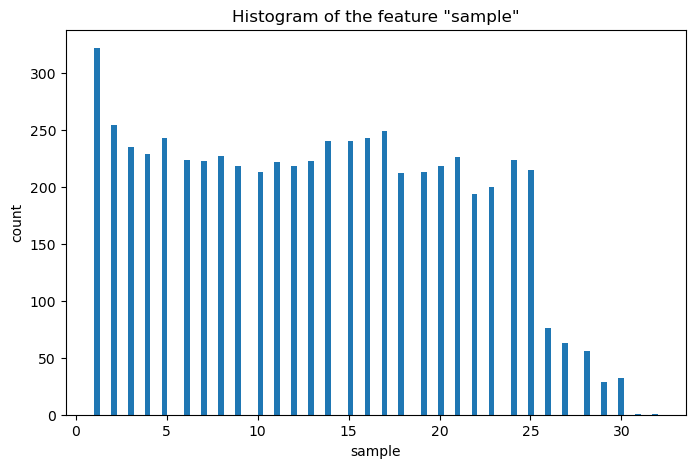

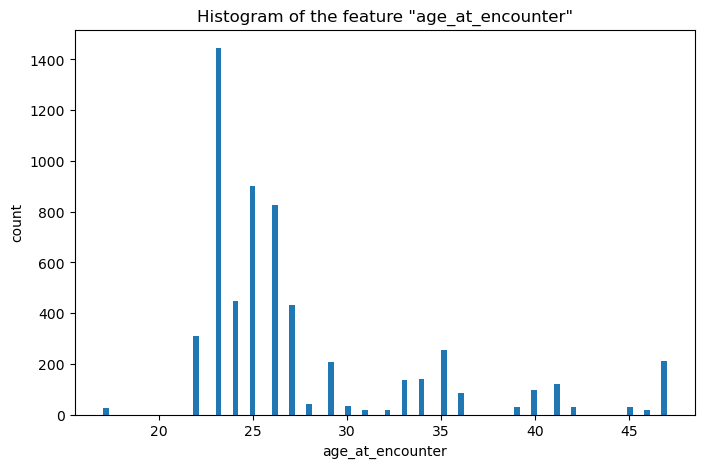

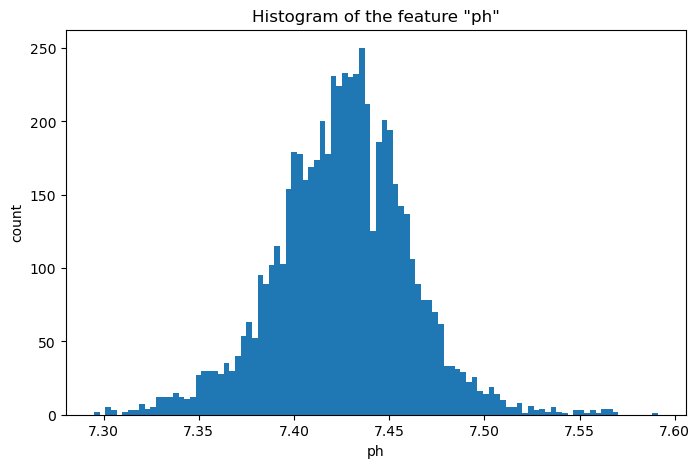

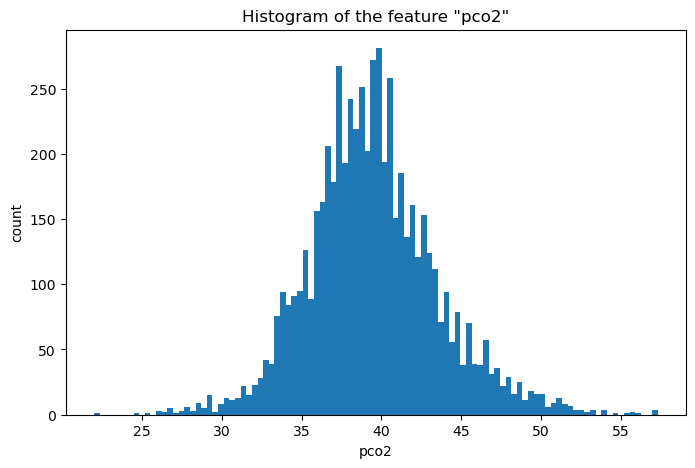

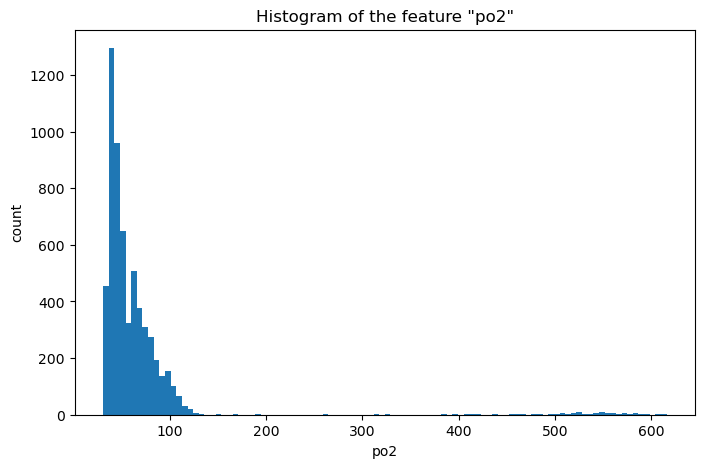

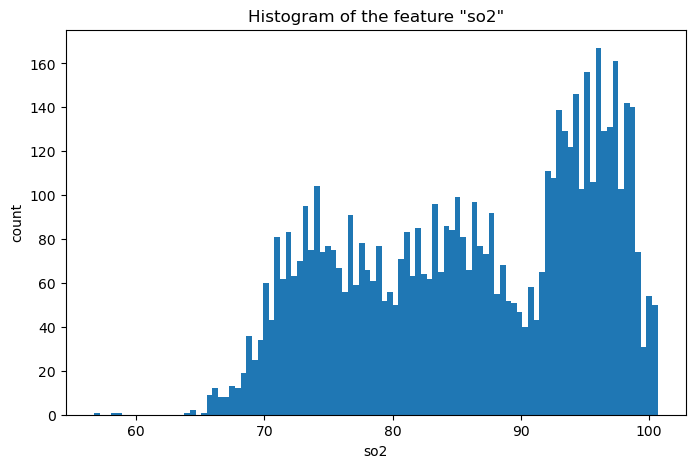

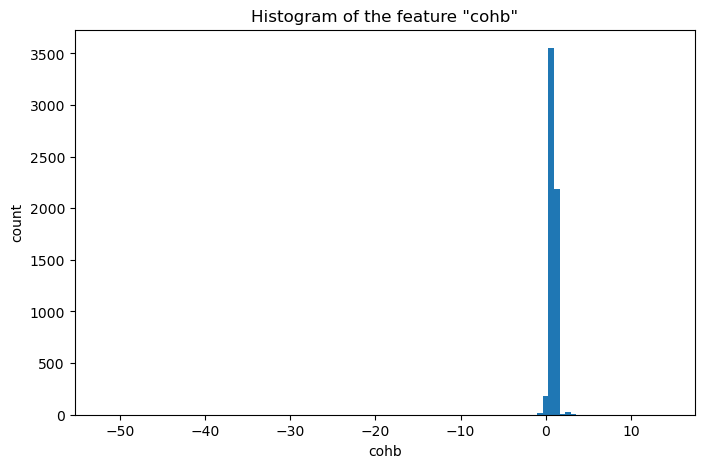

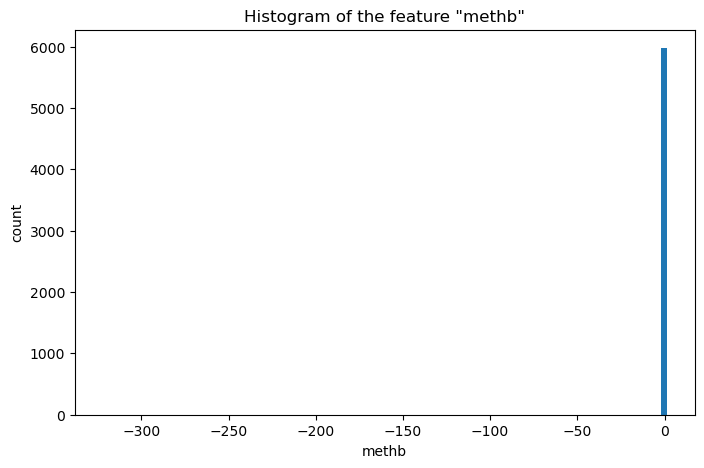

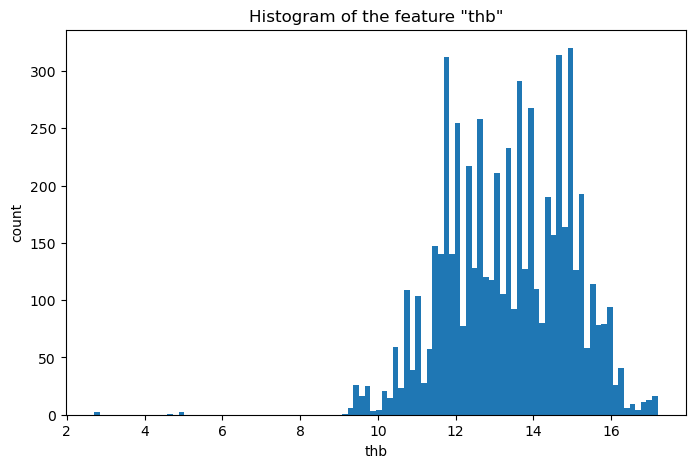

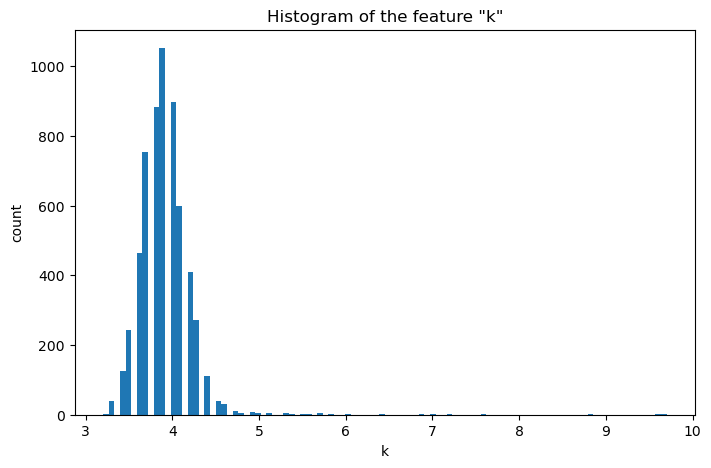

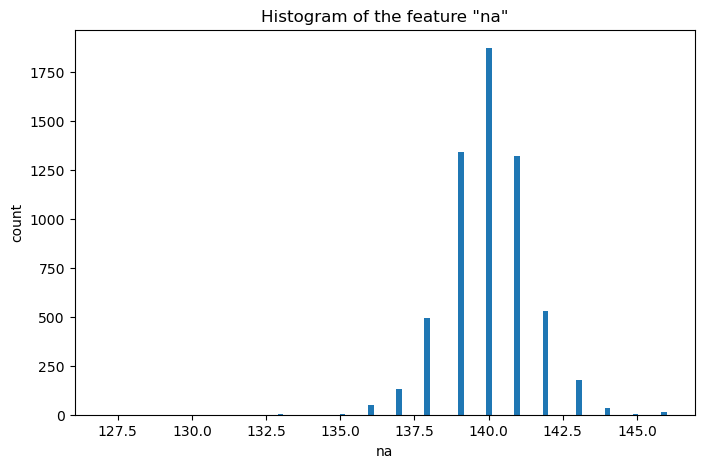

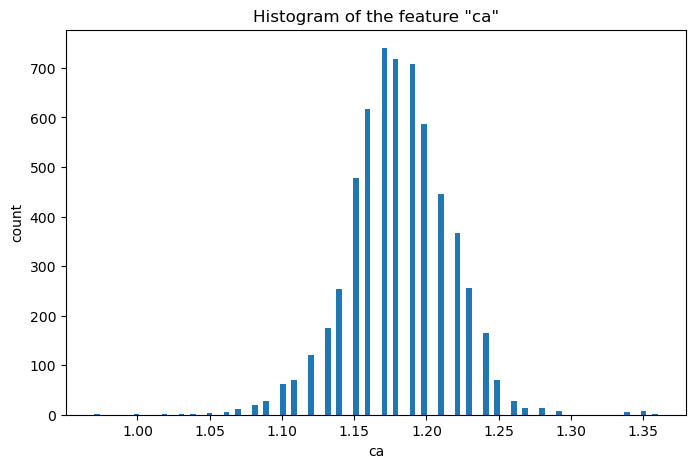

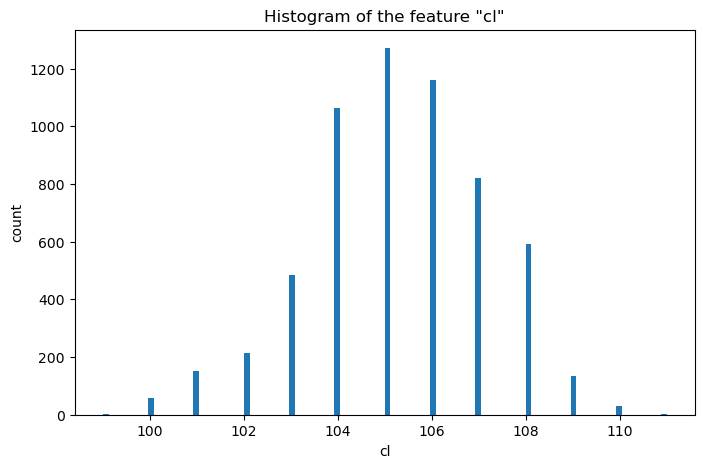

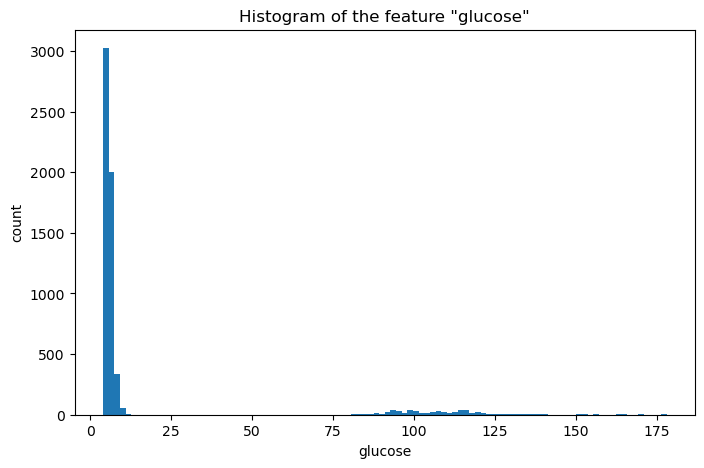

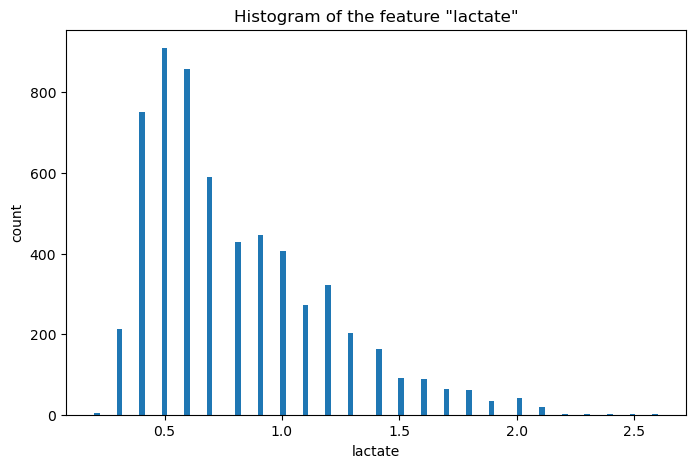

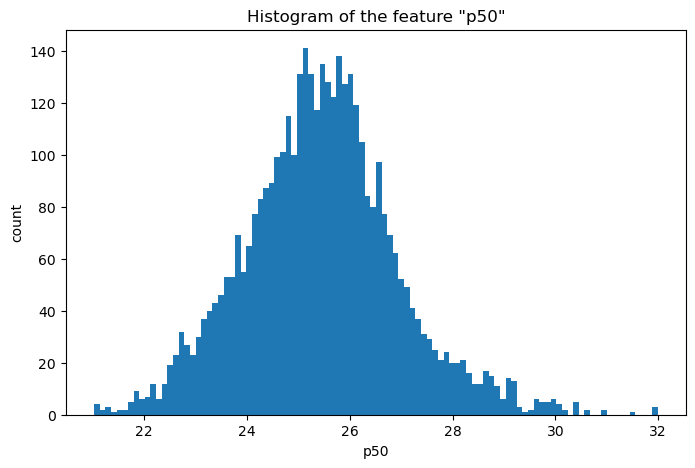

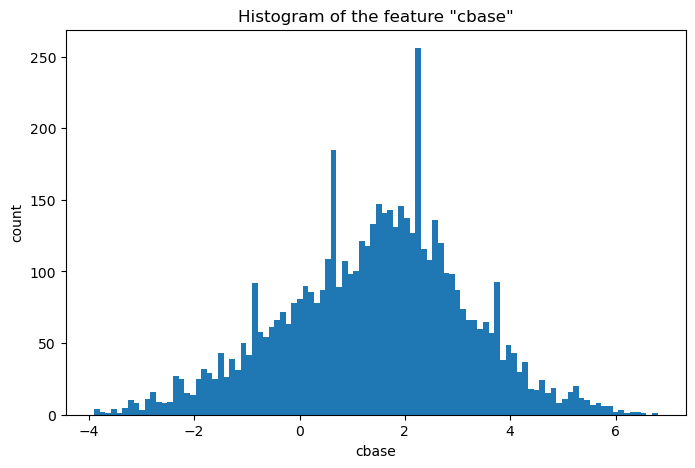

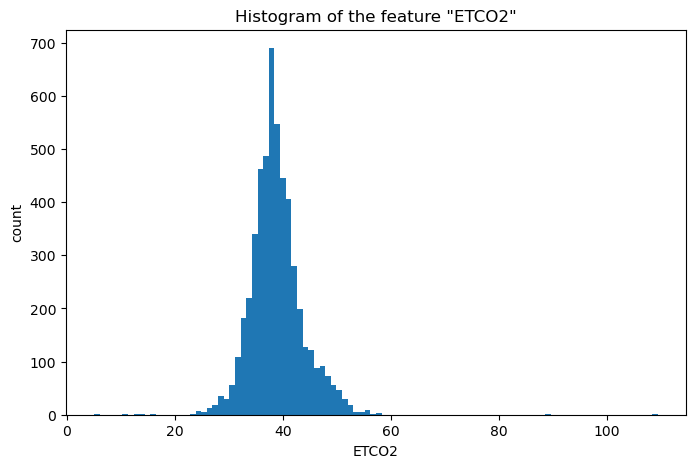

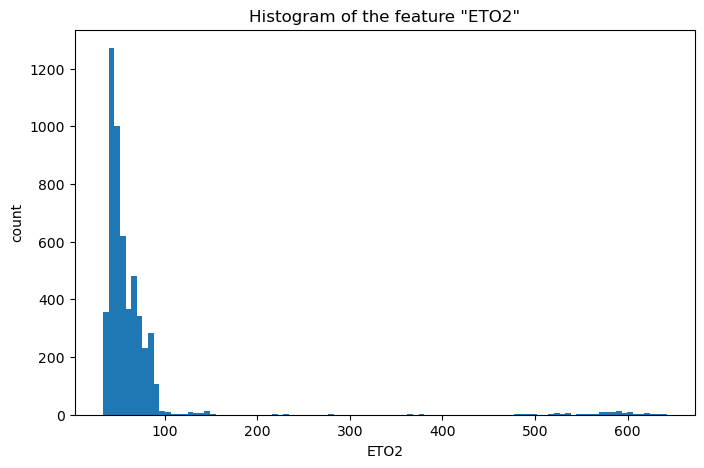

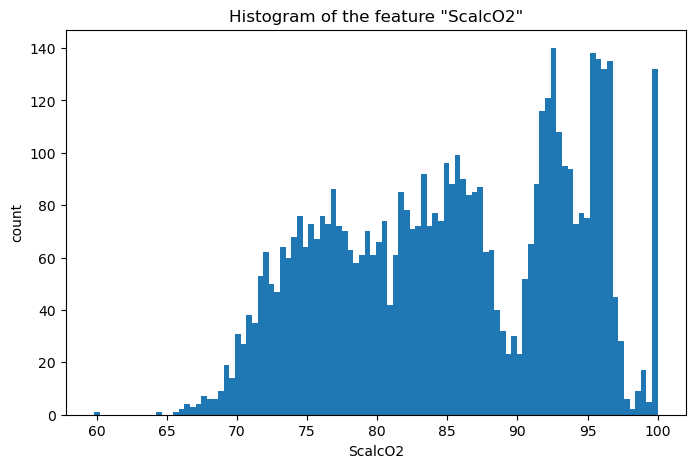

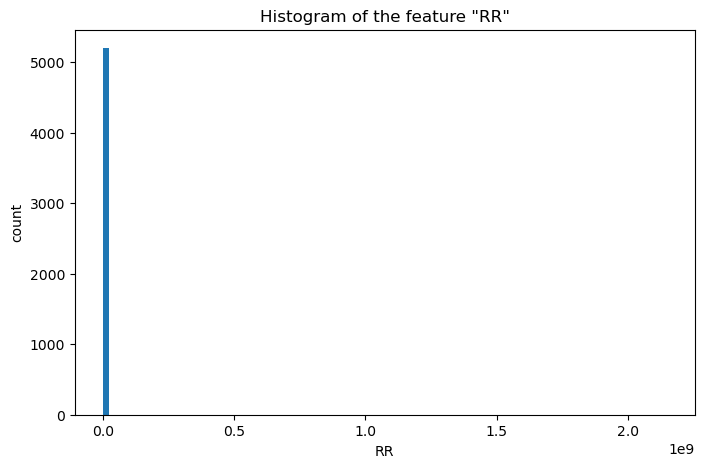

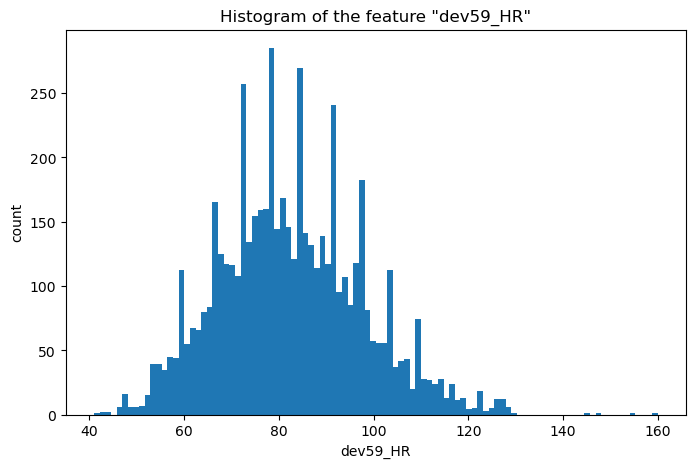

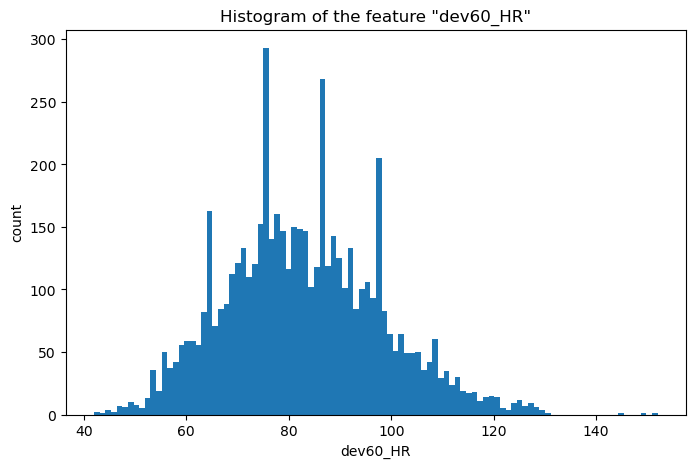

encounter_id  \
0     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
1     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
2     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
3     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
4     0739dab99bbdf8f7d28869c38ea50f3e087448d0a9419d...   
...                                                 ...   
4985  234883117521d5b69a245f7aa726fd53be2708234fc685...   
4986  234883117521d5b69a245f7aa726fd53be2708234fc685...   
4987  234883117521d5b69a245f7aa726fd53be2708234fc685...   
4988  234883117521d5b69a245f7aa726fd53be2708234fc685...   
4989  234883117521d5b69a245f7aa726fd53be2708234fc685...   

                                             patient_id            datetime  \
0     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:25:00   
1     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:17:00   
2     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:30:00   
3     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:59:00   
4     08e4c37178f47f878973d57ebbe0f9c33a2abf1d4a853a... 2223-05-28 16:58:00   
...                                                 ...                 ...   
4985  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:48:00   
4986  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:47:00   
4987  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 10:44:00   
4988  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 11:13:00   
4989  ff8fa32a2f1d25174ae46daf898b25963c9bfb0b6ba484... 2136-07-24 11:14:00   

      sample assigned_sex race  ethnicity  age_at_encounter  warming     ph  \
0        9.0       Female  NaN        1.0              46.0      1.0  7.457   
1        2.0       Female  NaN        1.0              46.0      1.0  7.449   
2       10.0       Female  NaN        1.0              46.0      1.0  7.462   
3       27.0       Female  NaN        1.0              46.0      1.0  7.441   
4       26.0       Female  NaN        1.0              46.0      1.0  7.443   
...      ...          ...  ...        ...               ...      ...    ...   
4985     4.0         Male   10        1.0              26.0      0.0  7.372   
4986     2.0         Male   10        1.0              26.0      0.0  7.380   
4987     1.0         Male   10        1.0              26.0      0.0  7.431   
4988    24.0         Male   10        1.0              26.0      0.0  7.466   
4989    25.0         Male   10        1.0              26.0      0.0  7.469   

      ...  glucose  lactate    p50  cbase      ETCO2        ETO2     ScalcO2  \
0     ...      4.7      0.6  24.56    3.5  37.707550   50.263626   86.822453   
1     ...      4.9      0.7  23.97    3.1  39.768162   64.370638   93.082350   
2     ...      4.9      0.6  25.15    3.8  37.788303   44.832278   82.252676   
3     ...      5.0      0.5  25.55    3.1  39.896782   44.632141   81.353945   
4     ...      4.8      0.6  25.19    3.2  40.001431   44.567948   81.252708   
...   ...      ...      ...    ...    ...        ...         ...         ...   
4985  ...      5.2      0.6  27.47    2.5  52.193684   87.427085   95.682926   
4986  ...      5.1      0.6  27.27    2.9  51.096764   87.689073   95.787177   
4987  ...      4.8      0.7  25.63    2.5        NaN  117.015374  100.000000   
4988  ...      5.8      0.6  23.27    3.1  37.578163   35.274369   71.570633   
4989  ...      5.9      0.7  23.17    3.7  37.198002   36.063190   73.099879   

       RR  dev59_HR  dev60_HR  
0     8.0      67.0      67.0  
1     8.0      61.0      62.0  
2     8.0      72.0      72.0  
3     8.0      71.0      72.0  
4     8.0      69.0      70.0  
...   ...       ...       ...  
4985  8.0      62.0      61.0  
4986  8.0      61.0      58.0  
4987  NaN      57.0      59.0  
4988  9.0      84.0      86.0  
4989  9.0      84.0      84.0  

[4990 rows x 30 columns]

In [21]:
#we can remove the column 'type' (only filled with 1's)
merged_df.drop('type', axis = 1, inplace=True)

#I also take the decision to remove dev64_HR because this column presents way to many NaN values and its data
#will mostly be described using the other dev features that also measure the heart rate
merged_df.drop('dev64_HR', axis = 1, inplace=True)

#searching for columns only filled with NaN's
for i in range(len(merged_df.columns)):
    NaN_count = merged_df[columns_to_merge[i]].isna().sum()
    if(NaN_count == len(merged_df)):
        merged_df.drop(columns_to_merge[i], axis=1, inplace=True)

columns_to_keep = ['sample', 'age_at_encounter', 'ph', 'pco2', 'po2', 'so2', 'cohb', 'methb', 
                   'thb', 'k', 'na', 'ca', 'cl', 'glucose', 'lactate', 
                   'p50', 'cbase', 'ETCO2', 'ETO2', 'ScalcO2', 'RR', 'dev59_HR', 'dev60_HR']

#some data can't have outliers (ids for example), therefore we can discard them for this part :
merged_filtered = merged_df[columns_to_keep]

for i in merged_filtered.columns:
    plt.figure(figsize=(8,5))
    plt.hist(merged_filtered[i].dropna(), bins=100)
    plt.title('Histogram of the feature \"{}\"'.format(i))
    plt.ylabel('count')
    plt.xlabel(i)
    plt.show()
    
#After analyzing visualy the data, we will use z-score for normal distributed features and IQR for the others
columns_for_z = ['ph', 'pco2', 'k', 'na', 'ca', 'cl','p50', 
                 'cbase', 'ETCO2', 'dev59_HR', 'dev60_HR']

z_outliers = pd.DataFrame(columns = columns_for_z)

#computing z scores
z_scores = sp.stats.zscore(merged_filtered)
for column in z_outliers:
    for i in range(len(z_scores[column])):
        if(np.abs(z_scores[column][i]) >= 3):
            z_outliers.loc[len(z_outliers), column] = i

nb_outliers = z_outliers.count()
   
#for each column, |z| <= 3 contains 99,7% of the data, meaning that not all outliers that we found are real outliers
#therefore, we will compute how many observattions correpond to these 0.3% and drop the observations that exceed these 
#0.3% (and have the highest z score)
drop_table = []
for column in columns_for_z:
    nb_03_percents = merged_filtered[column].count()
    nb_03_percents = nb_03_percents * 0.3 / 100
    
    if(nb_outliers[column] > nb_03_percents):
        for j in range(int(nb_outliers[column] - nb_03_percents)): 
            to_drop = np.argmax(z_scores[column])
            drop_table.append(to_drop)
            
            #setting the value to drop to -inf in order to take the next max value at the next iteration
            z_scores[column][to_drop] = -np.inf 
            
drop_table = list(set(drop_table)) # keeps only unique indexes
merged_df.drop(index=drop_table, inplace=True)
merged_df.reset_index(drop=True, inplace=True)

#using IQR method for the non Gaussian variables
columns_for_iqr = ['so2', 'methb', 'thb', 'glucose', 'lactate', 'ETO2', 'ScalcO2', 'RR', 'cohb', 'po2']
multiplier = 0
for column in columns_for_iqr:
    q1 = merged_df[column].quantile(0.25)                 
    q3 = merged_df[column].quantile(0.75)
    iqr = q3 - q1
    
    #depending of the skewness of the data, we use different coefficients
    skewness = merged_df[column].skew()
    if(abs(skewness) < 0.5):
        multiplier = 1.5
    elif(abs(skewness) < 1):
        multiplier = 1.75
    elif(abs(skewness) < 2):
        multiplier = 2.25
    else:
        multiplier = 2.5

    #droping the outliers
    for i in range(len(merged_df[column])):
        if(merged_df[column][i] <= q1 - multiplier * iqr or merged_df[column][i] >= q3 + multiplier * iqr):
            merged_df.drop(index=i, inplace=True)
            
    merged_df.reset_index(drop=True, inplace=True)

merged_df

<div class="alert alert-success">
    
**Exercise**. Compute descriptive or summary statistics of each individual column of the dataset. Comment on the results.
    
</div>

In [22]:
merged_df[['datetime', 'sample', 'ethnicity', 'age_at_encounter', 'warming', 'race']].describe()

sample    ethnicity  age_at_encounter      warming
count  4990.000000  4974.000000       4891.000000  4577.000000
mean     13.243888     1.103739         27.446943     0.657636
std       7.640292     0.304953          6.216953     0.474553
min       1.000000     1.000000         17.000000     0.000000
25%       7.000000     1.000000         23.000000     0.000000
50%      13.000000     1.000000         25.000000     1.000000
75%      20.000000     1.000000         27.000000     1.000000
max      32.000000     2.000000         47.000000     1.000000

Demographic features : We observe that the mean ethnicity value is close to 1, indicating that the majority of patients are not Hispanic. The average age is 27.35 years (with the third quartile at 27), suggesting that we are dealing with a young population. On average, about 13 samples are taken per patient. The warming mean is above 0.5, meaning that more than half of the patients need to be kept at a specific temperature, likely due to a medical condition.

In [23]:
merged_df[['ph', 'pco2', 'po2', 'RR']].describe()

ph         pco2          po2           RR
count  4990.000000  4990.000000  4990.000000  4357.000000
mean      7.425873    39.371984    56.432906    13.518591
std       0.032727     3.790287    19.228664     6.514596
min       7.313000    25.400000    30.800000     3.000000
25%       7.405000    36.900000    40.900000     8.000000
50%       7.427000    39.100000    49.650000     9.000000
75%       7.447000    41.700000    68.400000    20.000000
max       7.527000    51.800000   132.000000    40.000000

A brief analysis shows that the mean values of pH, pCO₂, and RR are within normal ranges. Variations in pH and pCO₂ could likely be attributed to the natural respiratory cycle of inhalation and exhalation by the patients ([Merck Manual](https://www.merckmanuals.com/professional/multimedia/video/overview-of-respiratory-acidosis)).

However, pO₂ stands out as the most abnormal variable. The high standard deviation in pO₂ values may be explained by changes in patient positioning and ventilation ([PubMed](https://pubmed.ncbi.nlm.nih.gov/3104554/)). Nonetheless, this does not fully account for the unusually low mean pO₂ of 56.51 mmHg, which is significantly below the normal range of 75-100 mmHg. Such a low pO₂ level, termed hypoxemia, indicates potential issues related to breathing or blood flow ([Mayo Clinic](https://www.mayoclinic.org/symptoms/hypoxemia/basics/definition/sym-20050930)), which could also explain the observed extremes in RR (Respiratory Rate).

In [24]:
merged_df[['so2', 'cohb', 'thb', 'p50']].describe()

so2         cohb          thb          p50
count  4990.000000  4990.000000  4990.000000  3653.000000
mean     85.699960     0.881042    13.287455    25.409959
std       9.223013     0.211679     1.537124     1.417281
min      56.700000     0.100000     9.200000    21.030000
25%      77.525000     0.800000    12.000000    24.500000
50%      86.300000     0.900000    13.300000    25.420000
75%      94.300000     1.000000    14.600000    26.270000
max      99.500000     1.600000    17.200000    30.640000

In this case, COHb shows normal values, which is not the case for SO₂ and tHb. SO₂ has unusually low values compared to the typical range (> 95%). This may be attributed to the low pO₂ values, as these two variables are closely related ([Cosinuss](https://www.cosinuss.com/en/measured-data/vital-signs/oxygen-saturation/)). The low levels of SO₂ (and pO₂) may also explain, as shown in Fig. 4 of the referenced source, why p50 values are slightly lower for some encounters.

tHb has values that are on the threshold of normal, which is typically around 13-16 g/dL. In our data, we observe some encounters with both very high and very low tHb values. Low values could be due to blood loss but may also be normal for certain individuals, such as during menstrual periods ([Mayo Clinic](https://www.mayoclinic.org/symptoms/low-hemoglobin/basics/causes/sym-20050760)). On the other hand, high levels of tHb is most often cause by low oxygen levels in the blood ([Mount Sinai](https://www.mountsinai.org/health-library/tests/hemoglobin#:~:text=HIGHER%20THAN%20NORMAL%20HEMOGLOBIN,increase%20in%20RBCs%20(polycythemia%20vera))) and is in accord with the noticed levels of pO₂, SO₂ and ETCO₂.

In [25]:
merged_df[['k', 'na', 'ca', 'cl', 'glucose', 'lactate', 'cbase']].describe()

k           na           ca           cl      glucose  \
count  4990.000000  4990.000000  4990.000000  4990.000000  4990.000000   
mean      3.889840   140.004609     1.179419   105.253307     5.756613   
std       0.244234     1.394294     0.033493     1.909026     0.880694   
min       3.200000   127.000000     0.970000    99.000000     3.900000   
25%       3.700000   139.000000     1.160000   104.000000     5.200000   
50%       3.900000   140.000000     1.180000   105.000000     5.500000   
75%       4.000000   141.000000     1.200000   107.000000     6.100000   
max       5.100000   146.000000     1.280000   111.000000     9.700000   

           lactate        cbase  
count  4990.000000  4990.000000  
mean      0.778617     1.413788  
std       0.361532     1.709649  
min       0.200000    -3.900000  
25%       0.500000     0.300000  
50%       0.700000     1.500000  
75%       1.000000     2.600000  
max       2.100000     6.400000

After a quick research : k, na, cl, glucose, lactate and cbase seem to be in completely normal ranges. However, ca is unusually high; there is no clear evidence (even in the correlation matrix below) for why that is, but it may be linked to low levels of pO₂ and more generally to hypoxia ([Science Direct](https://www.sciencedirect.com/science/article/abs/pii/002228287990381X)).

Note : as mentioned before, a part of the patients (big enough tu influence the mean) has hypoxemia (low levels of oxygen in the blood); hypoxia on the other hand, refers to low levels of oxygen in the tissues which could be due to hypoxemia but it is not always the case ([Cleveland Clinic](https://my.clevelandclinic.org/health/diseases/17727-hypoxemia)).

In [26]:
merged_df[['ETCO2', 'ETO2', 'ScalcO2']].describe()

ETCO2         ETO2      ScalcO2
count  4371.000000  4378.000000  4378.000000
mean     38.792003    55.896438    84.925242
std       4.515653    15.089190     8.058322
min       5.070166    33.438305    59.821548
25%      36.029763    43.679255    78.070681
50%      38.344902    51.204842    85.215460
75%      41.093621    65.934039    92.436712
max     109.369560   127.227443   100.000000

ETCO₂ appears to be within the normal range of 35-45 mmHg ([AAST](https://www.aastweb.org/Portals/0/Docs/Resources/Guidelines/End-Tidal%20CO2-1.pdf)). On the other hand, ETO₂, which represents the oxygen concentration during exhalation and is strongly correlated with pO₂ ([ScienceDirect](https://www.sciencedirect.com/science/article/abs/pii/S0736467924002300#:~:text=ETO2%20is%20the%20oxygen,pressure%20of%20oxygen%20(1).)), shows significantly lower values than expected. Consequently, ScalcO₂ also displays lower-than-normal values, as it is dependent on ETO₂.

Note : even though z score and IQR was used for outliers, some outlying values have pass through as we can see the max value for ETCO₂ and ETO₂ are above 100%.

In [27]:
merged_df[['dev59_HR', 'dev60_HR']].describe()	

dev59_HR     dev60_HR
count  4710.000000  4628.000000
mean     83.164544    83.467805
std      14.770729    14.949929
min      41.000000    42.000000
25%      73.000000    73.000000
50%      82.000000    82.000000
75%      93.000000    94.000000
max     155.000000   152.000000

The mean values of both heart rate measurements fall within the normal range. However, the observed variations in heart rate could have multiple underlying causes, making it difficult to attribute them to a single factor; possible influences include athletic conditioning, age, or underlying heart conditions. Given the low pO₂ and SO₂ levels combined with elevated heart rates, it’s possible that some patients may have been exposed to fine particles, as this can lead to decreased oxygen saturation and increased heart rate in response to hypoxia ([Journal of Epidemiology](https://journals.lww.com/epidem/fulltext/2000/07000/decreased_oxygen_saturation_and_increased_heart.302.aspx#:~:text=A%20decrease%20in%20oxygen%20saturation,or%20in%20response%20to%20hypoxia.)).

<div class="alert alert-success">
    
**Exercise**. Analyze and visualize the pairwise correlations between the columns of the dataset. Select an appropriate subset of the columns for which measuring correlations makes sense. Comment on some expected or unexpected correlations.

Next, by focusing on bloodsamples at index `sample=1`, `sample=5` and `sample=10` throughout the desaturation studies (decreasing saturation), display the scatter plots of some interesting variable pairs (e.g., oxygen saturation, age, sex, etc). Comment on the results.

</div>

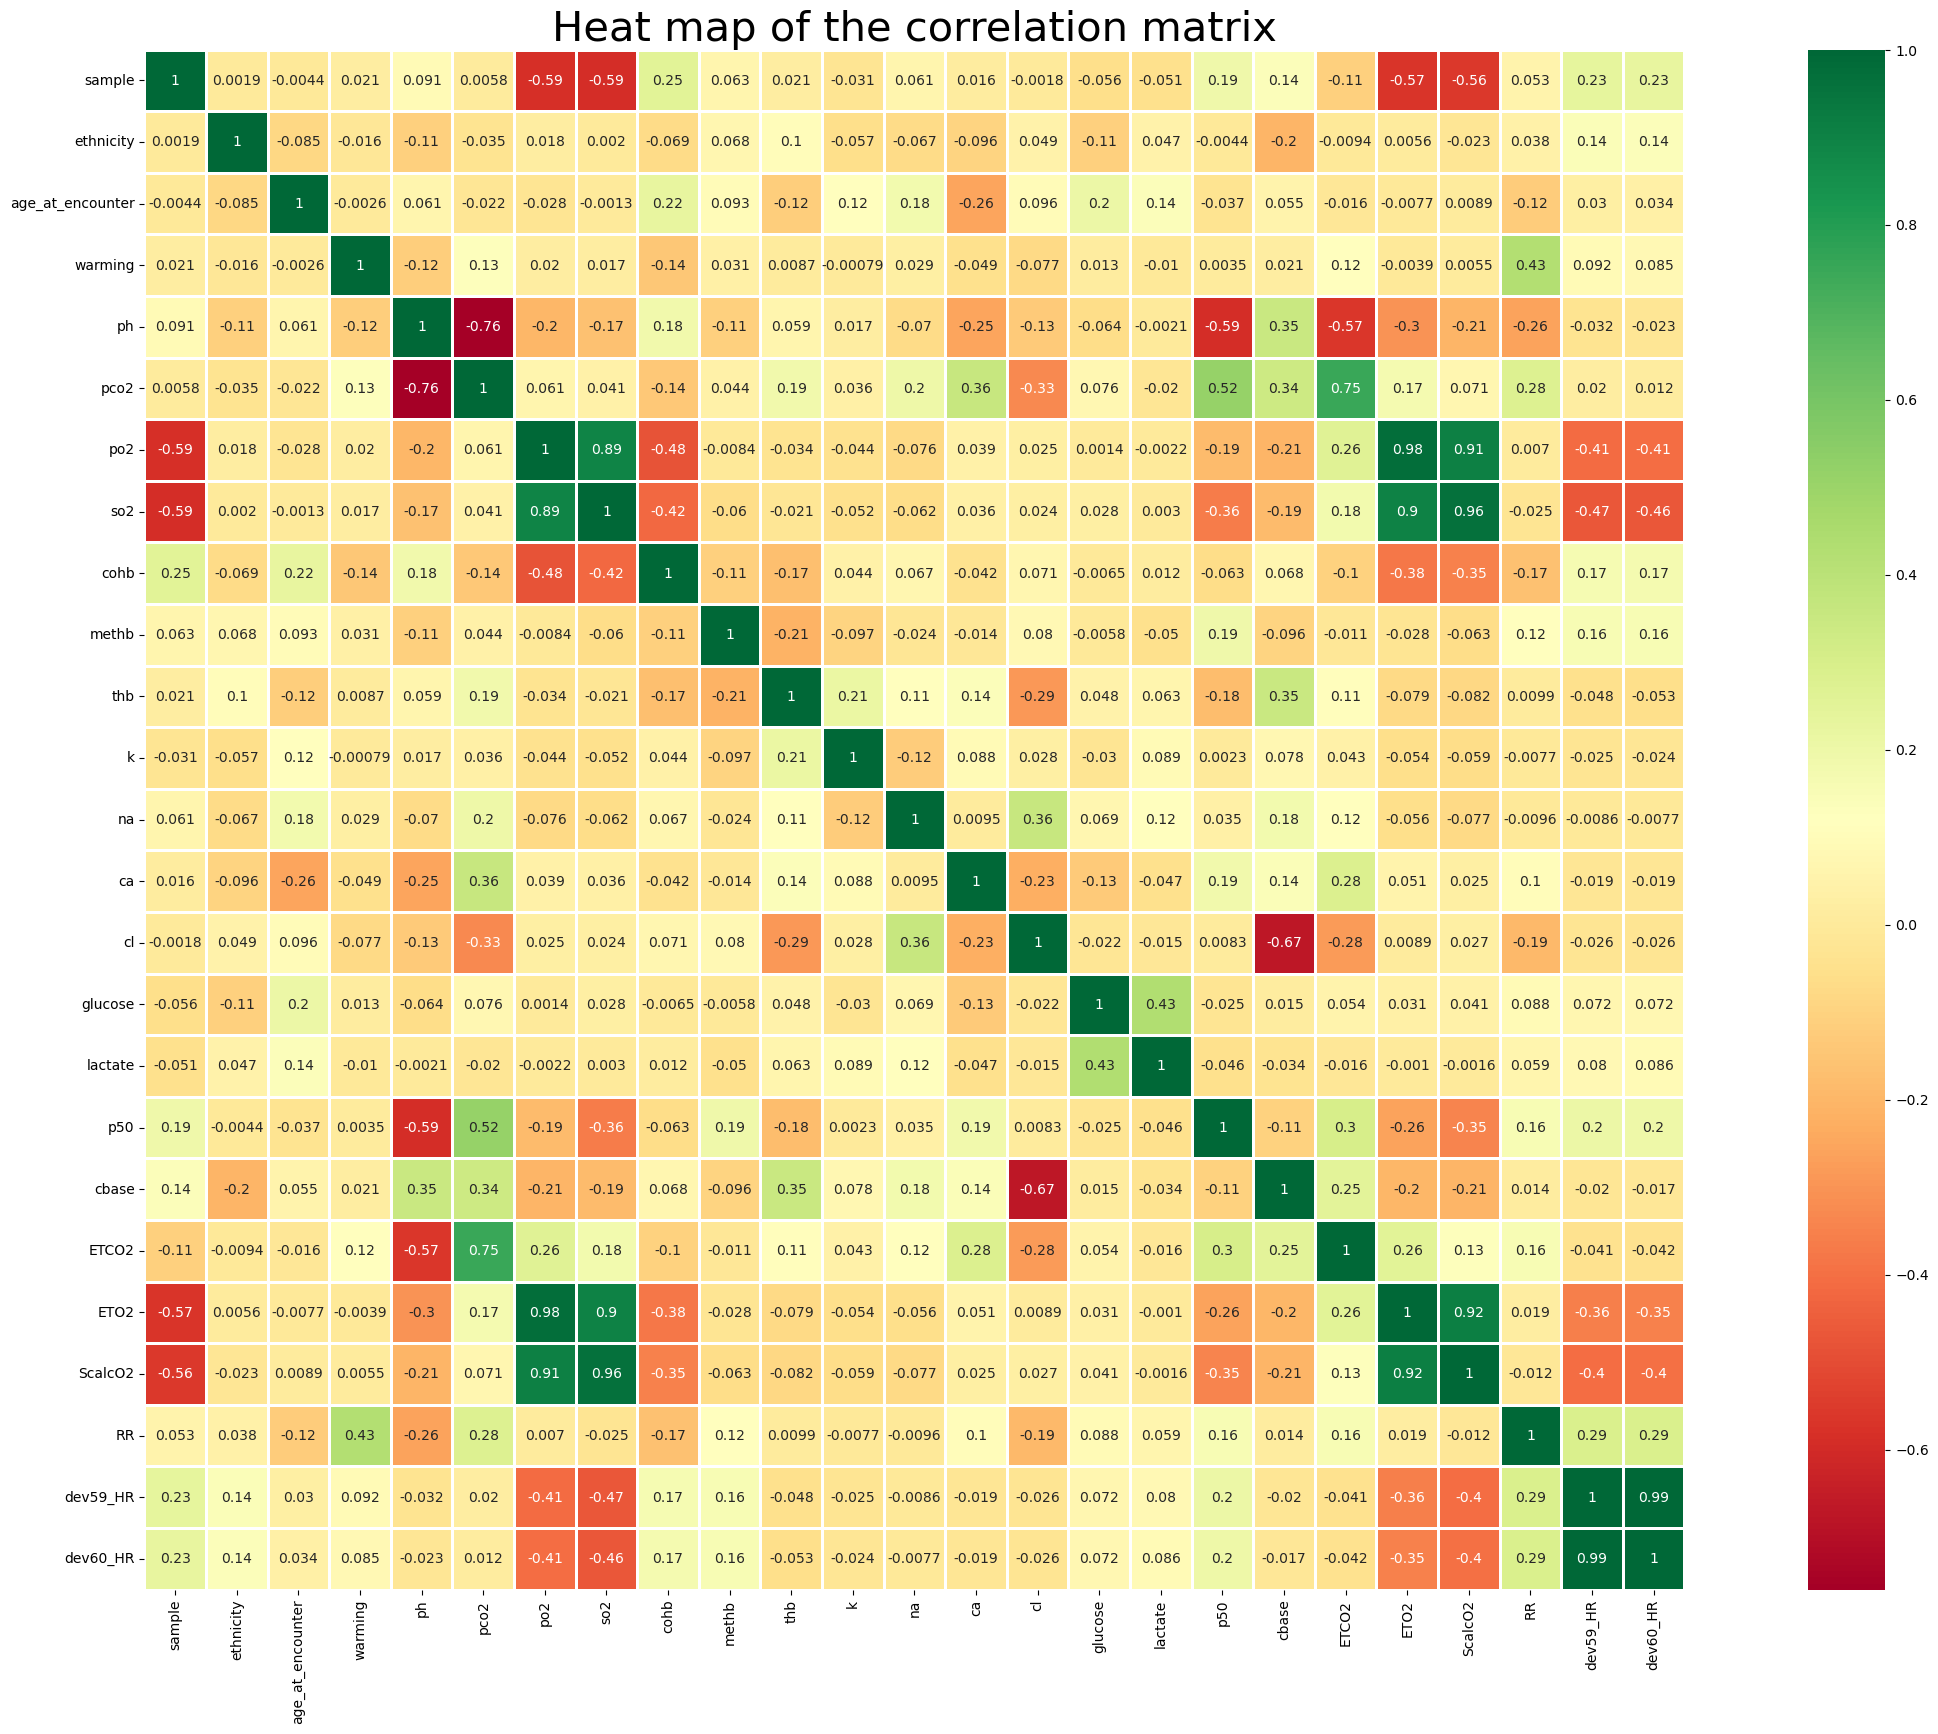

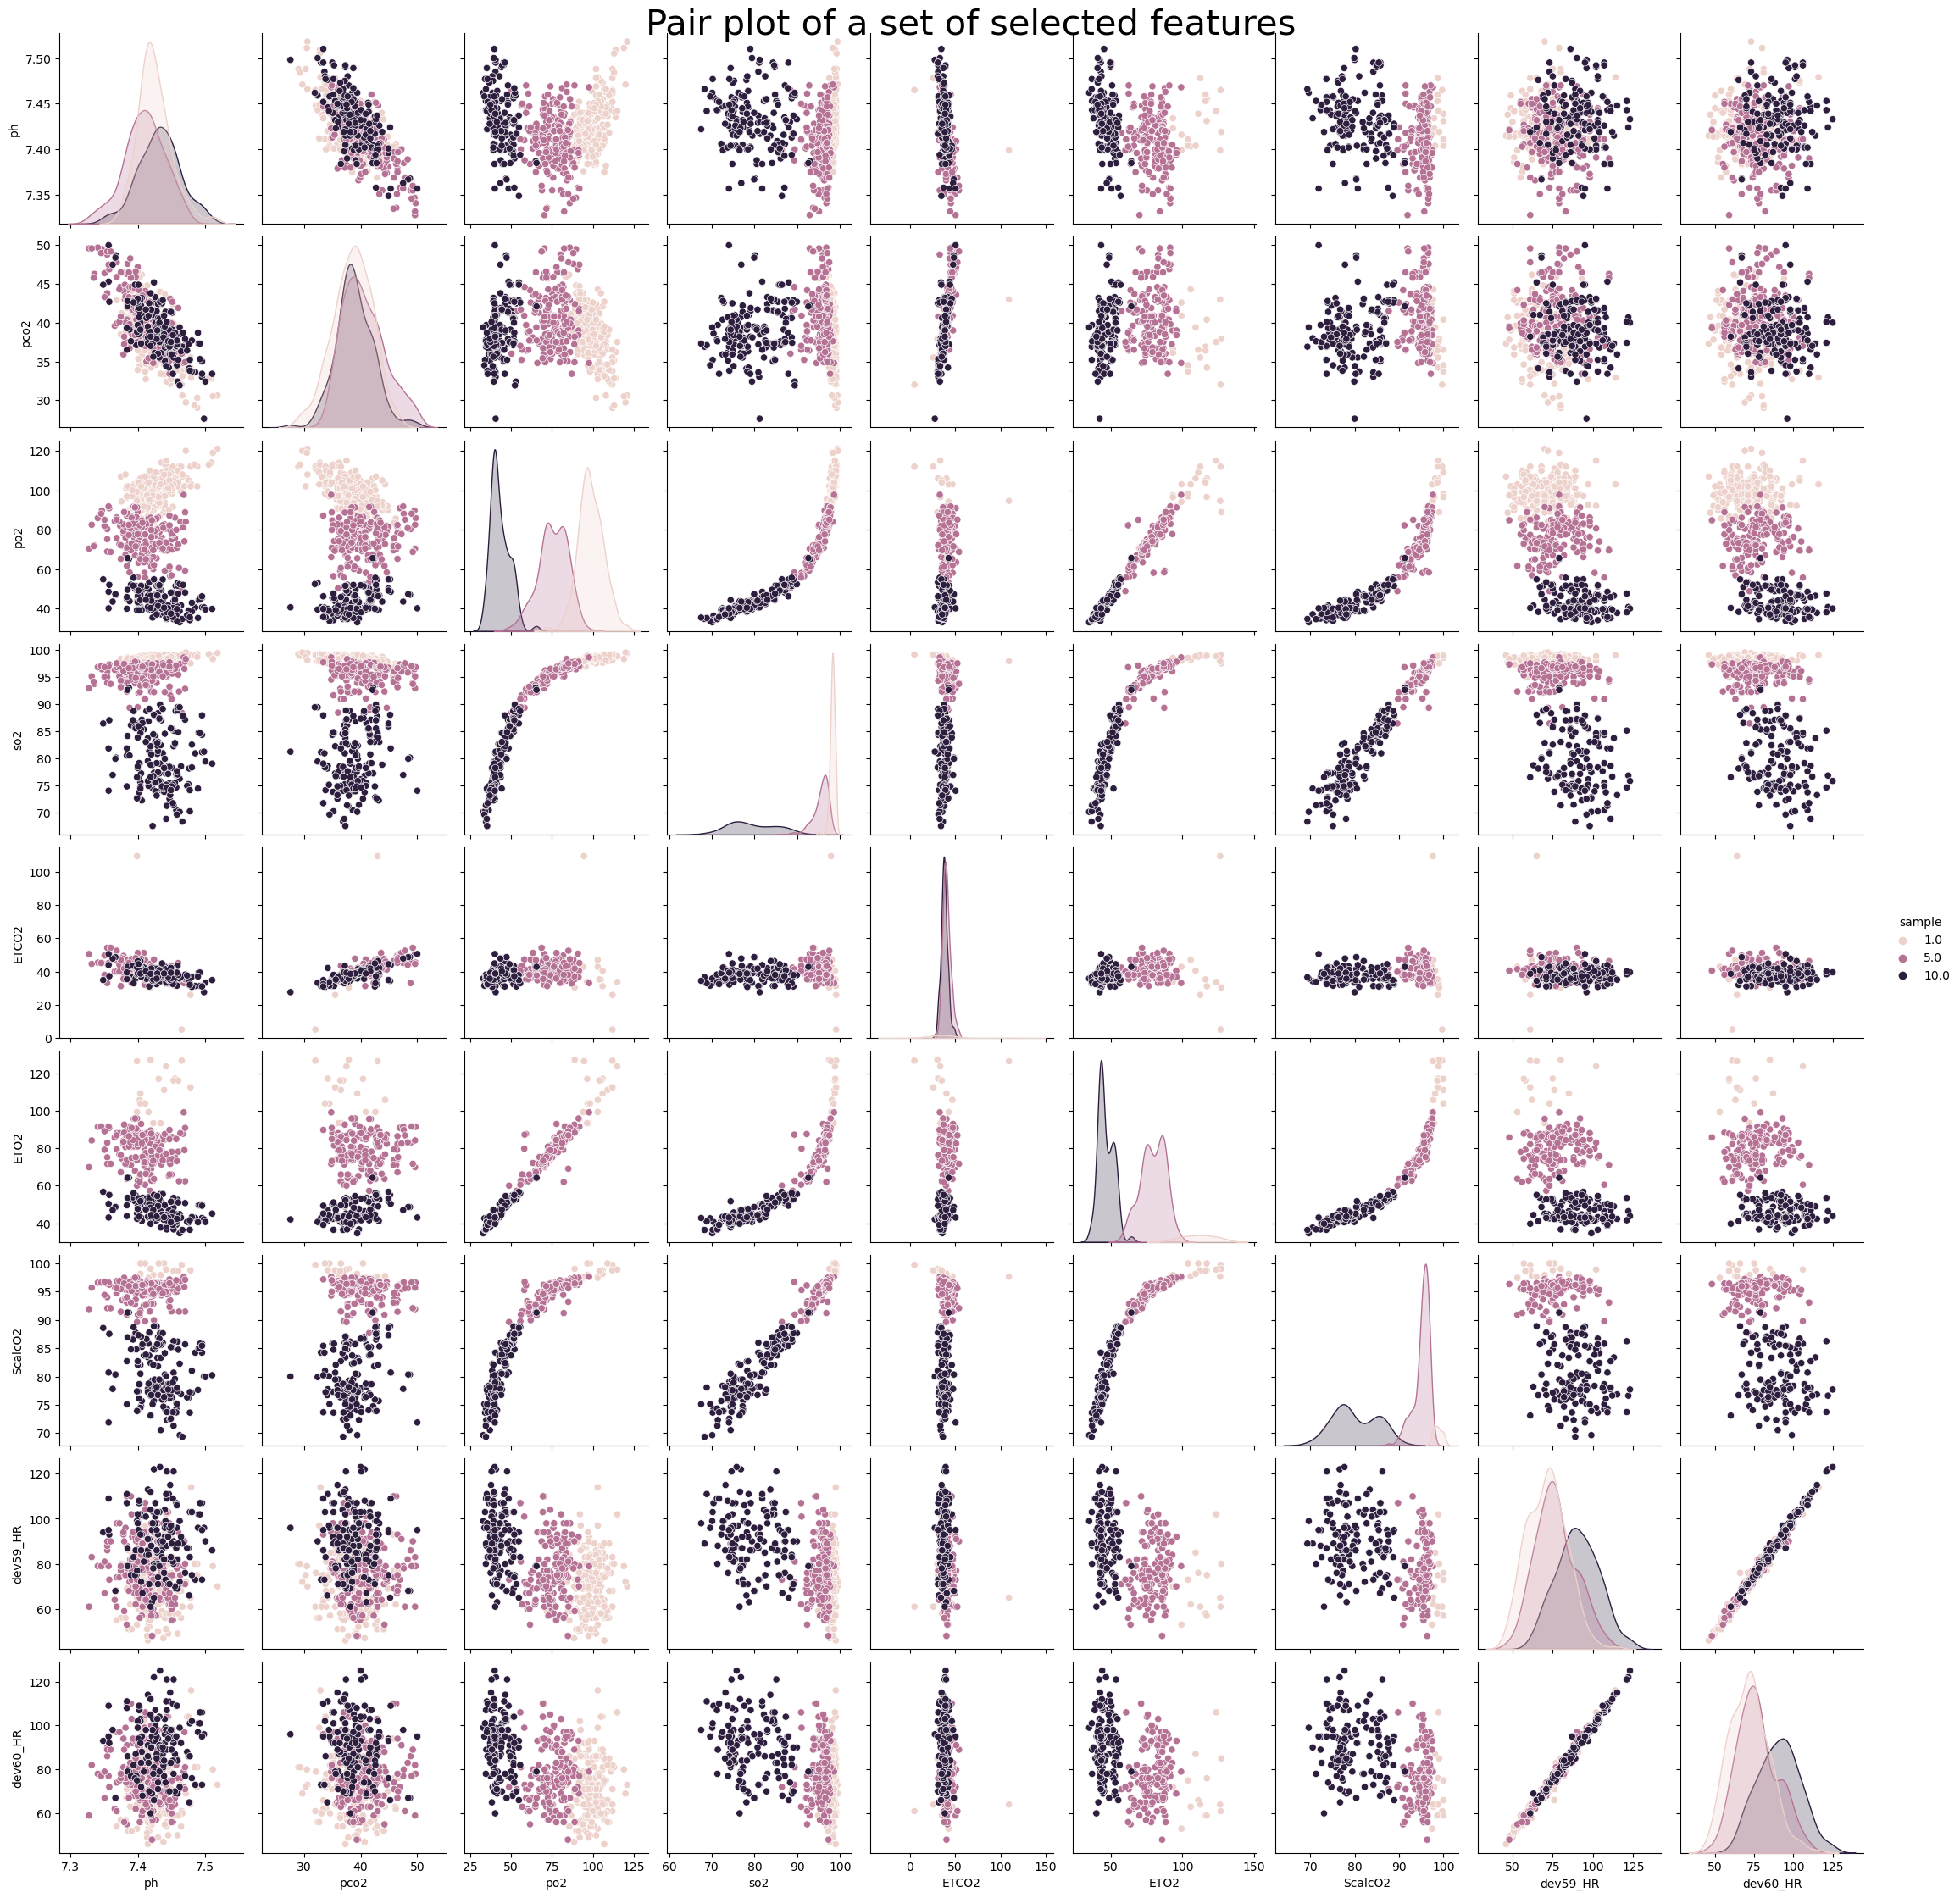

In [28]:
#computing and plotting the correlation matrix of the quantitative features
correlation_matrix = merged_df.corr(numeric_only=True)
plt.figure(figsize=(32,20))
plt.title('Heat map of the correlation matrix', fontsize=30)
sns.heatmap(correlation_matrix, linewidths=1, annot=True, square=True, cmap='RdYlGn')
plt.show()

#getting the samples mentioned in the statement
sample_1 = merged_df[merged_df['sample'] == 1]
sample_5 = merged_df[merged_df['sample'] == 5]
sample_10 = merged_df[merged_df['sample'] == 10]
samples = pd.concat([sample_1, sample_5, sample_10])

#choosing some interesting features to pair plot
columns_to_plot = ['ph', 'pco2', 'sample', 'po2', 'so2', 'ETCO2', 'ETO2', 'ScalcO2', 'dev59_HR', 'dev60_HR']

to_plot = samples[columns_to_plot]

tmp = sns.pairplot(to_plot, hue='sample')
tmp.fig.suptitle('Pair plot of a set of selected features', y=1, fontsize = 30)
plt.show()

The correlation matrix highlights the strongest relationships between variables, with features like pH, pCO₂, sample, pO₂, SO₂, ETCO₂, ETO₂, ScalcO₂, dev59_HR, and dev60_HR showing notable correlations. These selected features are included in the pair plot, providing a closer view of their interactions.

As expected, dev59_HR and dev60_HR have the highest correlation, which is logical given that both measure heart rate, likely from similar or related sources. This high correlation confirms their similarity and suggests they may be redundant for some analyses.

We also observe a strong correlation among SO₂, pO₂, and ETO₂. This relationship aligns with physiological expectations, as these measures all reflect aspects of oxygenation. The pair plot further illustrates this connection, showing clear positive trends between SO₂ and pO₂, as well as between SO₂ and ETO₂. This confirms that variations in one oxygen-related measure are mirrored in the others, likely due to their shared dependence on oxygen levels in the blood and respiration.

<div class="alert alert-success">
    
**Exercise**. Select 10 encounters at random. For these encounters, display the evaluation of the saturated O2 blood samples during a desaturation test as a function of the relative time since the start of the desaturation. Give your observations.

</div>

<div class="alert alert-danger">
    
**Advice**. It may be useful to filter out encounters that have a too long duration (too large difference between the maximum datetime and minimum datetime).

</div>

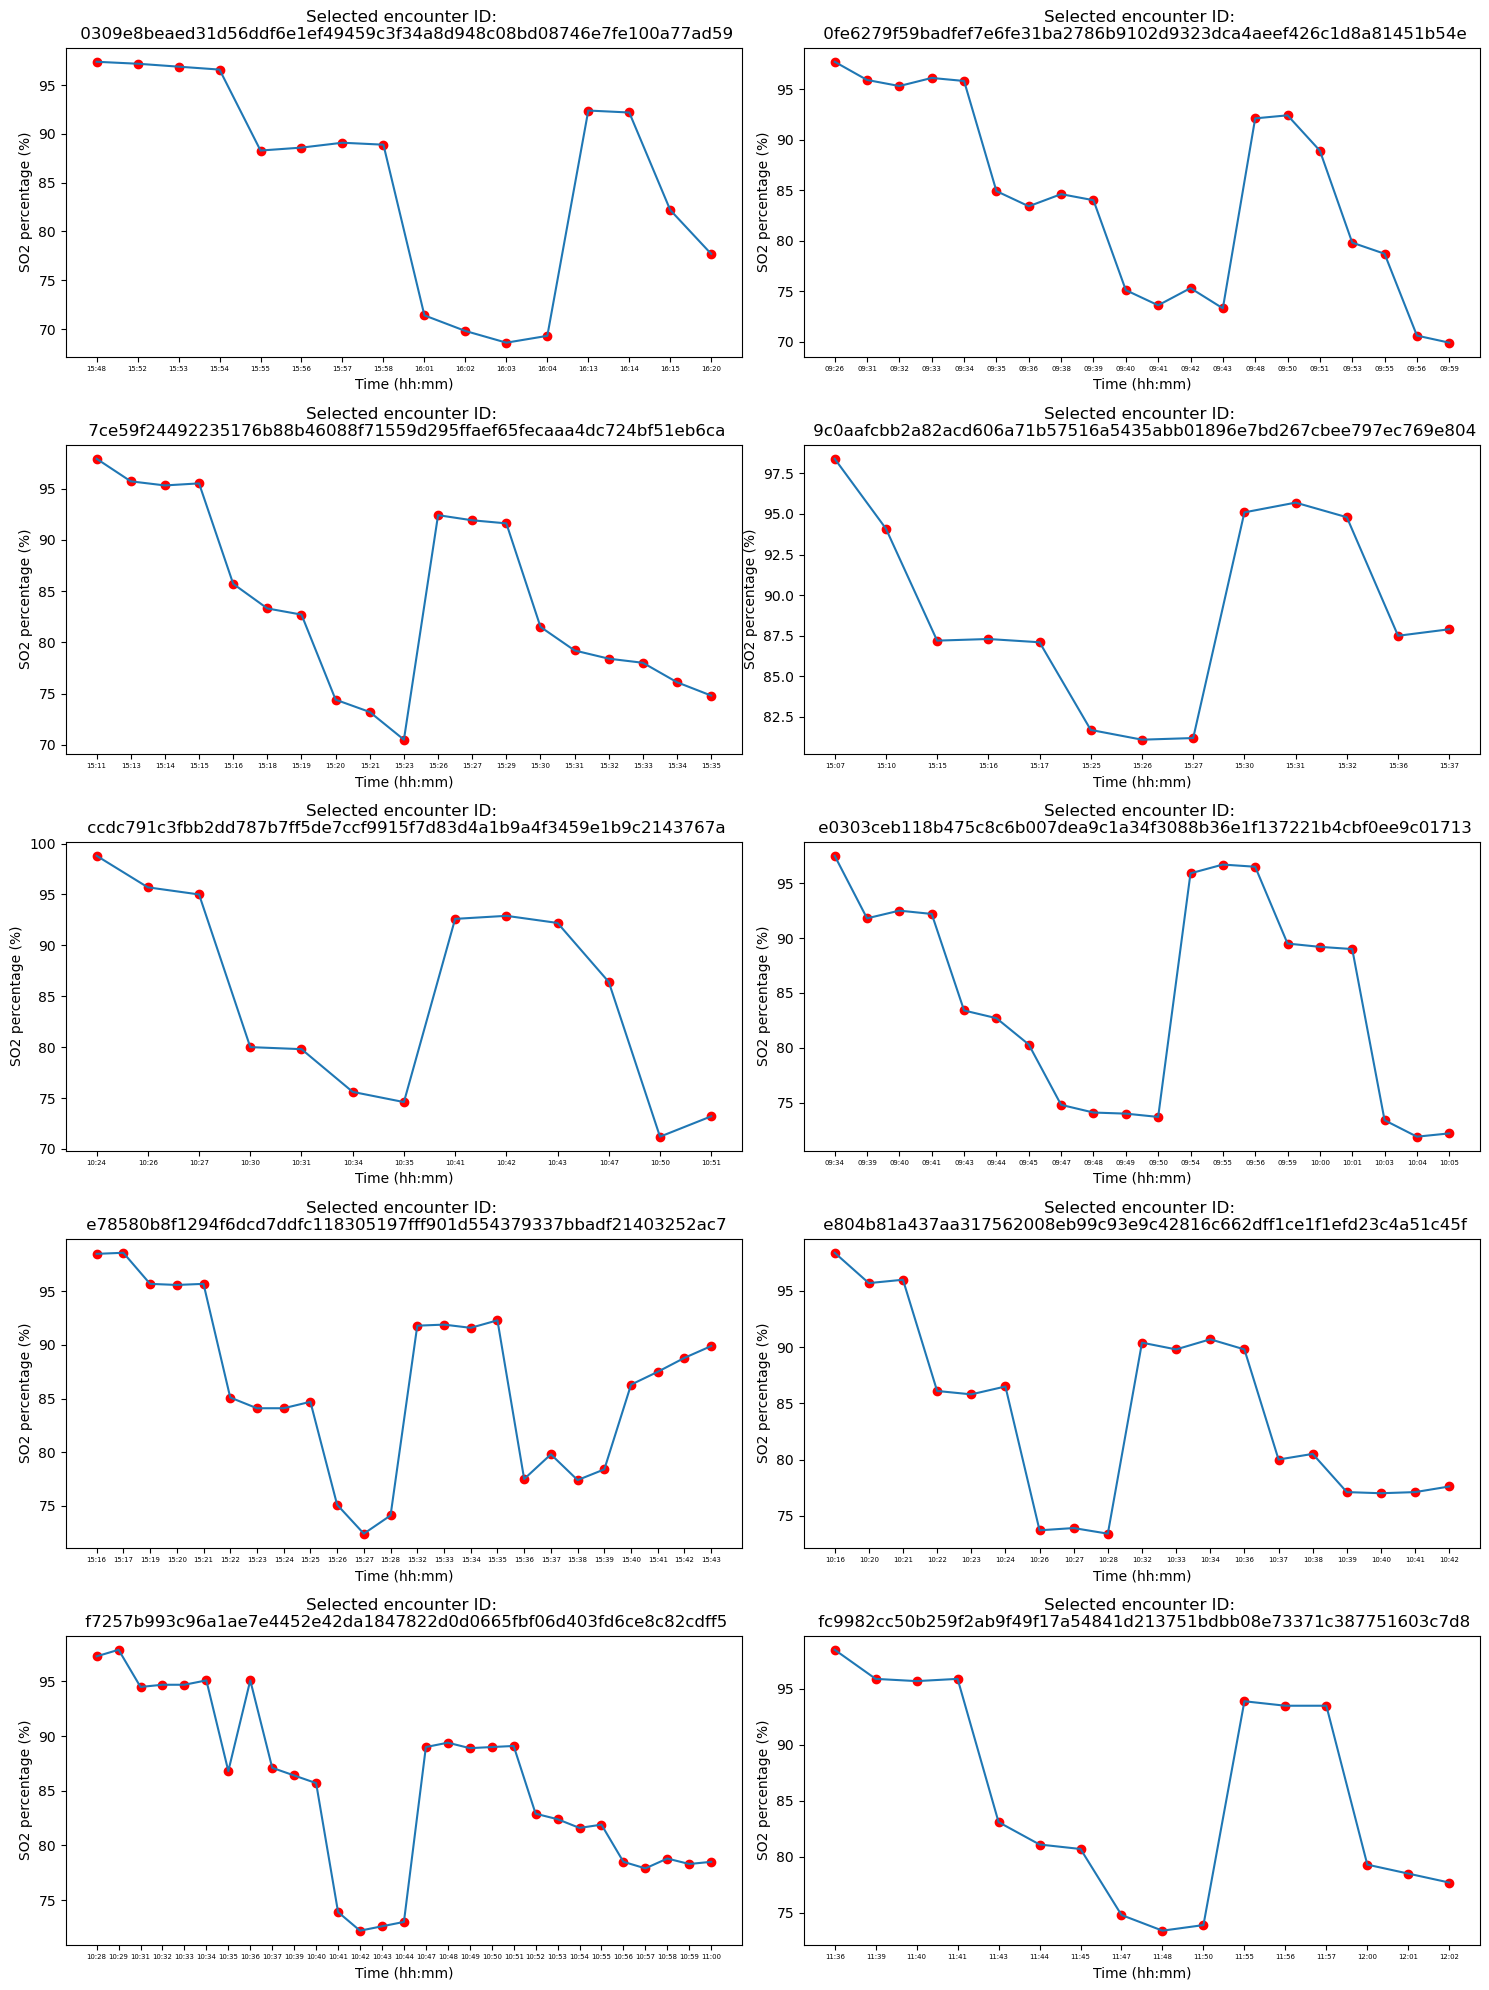

In [29]:
#getting the duration of each encounter
durations = merged_df.groupby('encounter_id')['datetime'].apply(lambda x: x.max() - x.min()).reset_index()
durations['datetime'] = durations['datetime'].dt.total_seconds()

#choosing the median as filter in order to avoid outliers (in this case an outlier is a long encounter
#which is different than the ouliers droped precedently) 
filter_threshold = durations['datetime'].median()

#getting rows that are <= filter
unique_encounters_to_keep = durations[durations['datetime'] <= filter_threshold].reset_index()
nb_unique_encounters_to_keep = len(unique_encounters_to_keep)

#choosing random (with a seed here) encounters
chosen_ids = []
random_multiplier = 0
while len(chosen_ids) < 10:
    index = np.random.RandomState(seed=random_multiplier*2).randint(0, nb_unique_encounters_to_keep - 1)
    encounter_id = unique_encounters_to_keep['encounter_id'][index]
    
    if(encounter_id not in chosen_ids and len(merged_df[merged_df['encounter_id'] == encounter_id]) >= 12):
        chosen_ids.append(encounter_id)
        
    random_multiplier += 1

chosen_encounters = merged_df[merged_df['encounter_id'].isin(chosen_ids)]

#plotting the different chosen encounters
fig, ax = plt.subplots(5, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5, wspace=1)
ax = ax.flatten()
for i, (encounter_id, frame) in enumerate(chosen_encounters.groupby('encounter_id')):
    frame = frame.sort_values(by='datetime')
    
    ax[i].plot(frame['datetime'].dt.strftime('%H:%M'), frame['so2'])
    ax[i].scatter(frame['datetime'].dt.strftime('%H:%M'), frame['so2'], color='red')

    ax[i].set_title(f'Selected encounter ID: \n {encounter_id}')
    ax[i].set_xlabel('Time (hh:mm)')
    ax[i].set_ylabel('SO2 percentage (%)')
    
    ax[i].tick_params(axis='x', labelsize=5)

plt.tight_layout()
plt.show()

In each of these 10 plots, a similar pattern is visible. The SO₂ concentration begins at a high level (above 95%) before dropping quickly to around 70-80%. This decrease is followed by a partial recovery, with SO₂ rising again but not reaching the initial peak (stabilizing around 90-95%), before eventually declining once more. In several plots, the final decline drops to a level even lower than the initial decrease.

These SO₂ values are noticeably lower than the typical range for a healthy individual (95-100%), with some readings falling as low as 70%. This abnormal pattern may be linked to the low pO₂ levels identified in the descriptive analysis, as the strong correlation between SO₂ and pO₂ (evident in the correlation matrix) suggests that changes in oxygen partial pressure significantly impact SO₂ levels

<div class="alert alert-success">
    
**Exercise**. Now, load the saturation data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_2hz.csv`. Then, also load the infrared PPG data from `data/waveforms/{ENCOUNTER_ID[0]}/{ENCOUNTER_ID}_ppg.dat` using the `wfdb` package.

Only focus on the first 17 minutes of the time series. Beware that they use different sampling frequencies.
    
</div>

In [30]:
ENCOUNTER_ID = str('0241a26f4be08b7312eab3099fb7e044376d7d433d69cc15ed67742b0ecf95f5')

In [31]:
path_csv = 'data/waveforms/' + ENCOUNTER_ID[0] + '/' + ENCOUNTER_ID + '_2hz.csv'
path_dat = 'data/waveforms/' + ENCOUNTER_ID[0] + '/' + ENCOUNTER_ID + '_ppg'

#reading data
saturation_data = pd.read_csv(path_csv)
ppg_record = wf.rdrecord(path_dat)

#getting the rates
saturation_sampling_rate = 2  # 2 Hz (seen in csv file)
ppg_sampling_rate = ppg_record.fs  # PPG sampling rate from file

#computing the total number of samples in function ot the rates
nb_samples_17_min_sat = 17 * 60 * saturation_sampling_rate
nb_samples_17_min_ppg = int(17 * 60 * ppg_sampling_rate)

#getting the data for the first 17 minutes
saturation_data_SPO2 = []
for i in range(nb_samples_17_min_sat):
    saturation_data_SPO2.append(saturation_data['dev60_SpO2'][i])

ppg_IR = []
for i in range(nb_samples_17_min_ppg):
    ppg_IR.append(ppg_record.p_signal[i][0])


<div class="alert alert-success">
    
**Exercise**. Knowing the sampling rates of the two time series, match them and plot them together on the same figure. Give your observations.

</div>

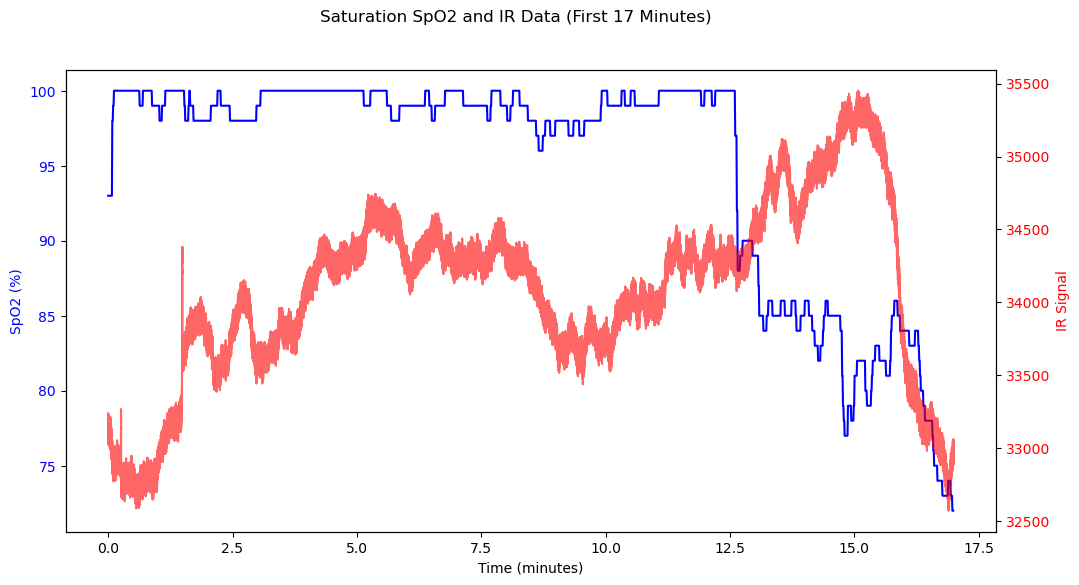

In [32]:
#plotting
time_saturation = np.arange(nb_samples_17_min_sat) / saturation_sampling_rate
time_ppg = np.arange(nb_samples_17_min_ppg) / ppg_sampling_rate
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(time_saturation / 60, saturation_data_SPO2, color='blue', label='Saturation SPO2')
ax1.set_xlabel('Time (minutes)')
ax1.set_ylabel('SpO2 (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(time_ppg / 60, ppg_IR, color='red', label='PPG IR', alpha = 0.6)
ax2.set_ylabel('IR Signal', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.suptitle('Saturation SpO2 and IR Data (First 17 Minutes)')
plt.show()

In the initial phase, we see both curves exhibiting a stable trend after a quick initial increase. After reaching 100%, SpO₂ stabilises there, while the IR signal (red) hovers around 34,000. Around the 12.5-minute mark, there’s a notable shift: the IR signal begins to increase sharply, while SpO₂ starts to decline. This divergence pauses briefly, after which both signals show a marked and simultaneous downward trend. This synchronized decrease suggests a potential physiological or environmental factor affecting both measurements in parallel.